# <center> SMDM Mini Project </center>

The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
> 1. Date
> 2. Quarter (Four Quarters)
> 3. Department (Sewing and Finishing)
> 4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
> 5. Team
> 6. Targeted_Producitivity (Target which needs to be achieved)
> 7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
> 8. WIP (Work in progress)
> 9. Over_time
> 10. Incentive
> 11. Idle_time
> 12. Idle_men (Idle workers)
> 13. no_of_style_change
> 14. no_of_workers
> 15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency, chi2, chisquare

In [3]:
garments_employees = pd.read_csv("./garments_worker_productivity.csv")
garments_employees.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


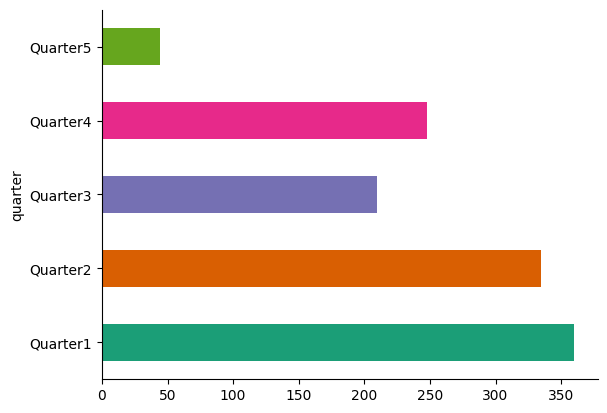

In [23]:
# @title quarter

garments_employees.groupby('quarter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
garments_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

### 1. Basic Summary statistics of the data for the numerical variables

In [8]:

garments_employees.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   8 non-null      float64
 1   targeted_productivity  8 non-null      float64
 2   smv                    8 non-null      float64
 3   wip                    8 non-null      float64
 4   over_time              8 non-null      float64
 5   incentive              8 non-null      float64
 6   idle_time              8 non-null      float64
 7   idle_men               8 non-null      float64
 8   no_of_style_change     8 non-null      float64
 9   no_of_workers          8 non-null      float64
 10  actual_productivity    8 non-null      float64
dtypes: float64(11)
memory usage: 768.0+ bytes


### 2 Basic Summary of the data for the number of working days, count of quarters in the year

In [31]:
garments_employees[['quarter', 'day']].describe()

,quarter,day
count,1197,1197
unique,5,6
top,Quarter1,Wednesday
freq,360,208


In [17]:
print("Data Distribution over Week Days")
print(garments_employees.day.value_counts())
print("\nData Distribution over Quarters")
print(garments_employees.quarter.value_counts())

Data Distribution over Week Days
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

Data Distribution over Quarters
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


### 3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly


         actual_productivity          
                        mean       std
quarter                               
Quarter1            0.751560  0.161318
Quarter2            0.743710  0.171114
Quarter3            0.704759  0.175614
Quarter4            0.709067  0.185983
Quarter5            0.826177  0.183851




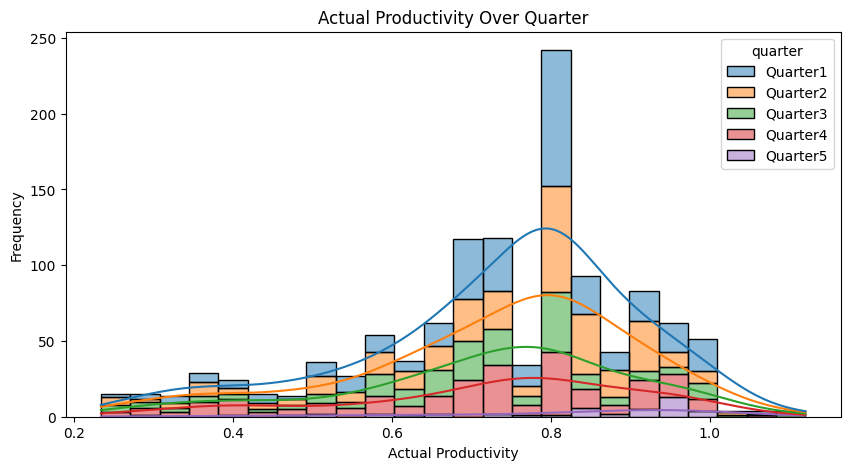

In [38]:
print(garments_employees.groupby('quarter').agg({'actual_productivity':['mean', 'std']}))

print("\n")
plt.figure(figsize=(10,5),dpi=100)
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Actual Productivity Over Quarter')
sns.histplot(data=garments_employees, x='actual_productivity', hue='quarter', multiple='stack', kde=True)
plt.show()


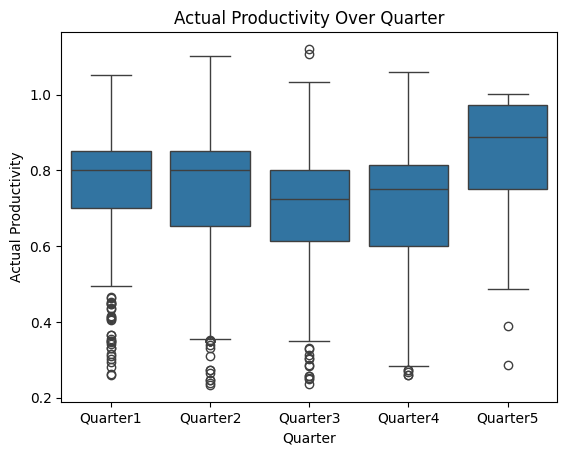

In [40]:
#Check for outliers
sns.boxplot(data=garments_employees,x='quarter',y='actual_productivity')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity Over Quarter')
plt.show()

In [44]:
print("Analysis of Mean & Std and Five Point Summary of Each Quarter")
print(garments_employees.groupby('quarter').agg({'actual_productivity':['mean', 'std']}))
garments_employees.actual_productivity.groupby(by=garments_employees.quarter).quantile([0, 0.25, 0.5, 0.75, 1])

Analysis of Mean & Std and Five Point Summary of Each Quarter
         actual_productivity          
                        mean       std
quarter                               
Quarter1            0.751560  0.161318
Quarter2            0.743710  0.171114
Quarter3            0.704759  0.175614
Quarter4            0.709067  0.185983
Quarter5            0.826177  0.183851


quarter       
Quarter1  0.00    0.260979
          0.25    0.699965
          0.50    0.800045
          0.75    0.850120
          1.00    1.050667
Quarter2  0.00    0.233705
          0.25    0.652280
          0.50    0.800035
          0.75    0.850502
          1.00    1.100484
Quarter3  0.00    0.235795
          0.25    0.613848
          0.50    0.725436
          0.75    0.800391
          1.00    1.120437
Quarter4  0.00    0.259375
          0.25    0.600431
          0.50    0.750411
          0.75    0.814431
          1.00    1.059621
Quarter5  0.00    0.286985
          0.25    0.750647
          0.50    0.888276
          0.75    0.971867
          1.00    1.000457
Name: actual_productivity, dtype: float64

### Observations:
 * **Mean**: Quarter 5 has the highest mean productivity, followed by Quarter 1, Quarter 2, Quarter 4, and Quarter 3.
 * **Standard Deviation**: Quarter 4 has the highest standard deviation, indicating more distributed in productivity compared to other quarters.

### Conclusion:
Overall, the productivity varies across quarters, with Quarter 5 exhibiting the highest average productivity and Quarter 4 having the highest variability.

- We observe that the actual productivity from quarter 1 to quarter 4 is more concentrated between the interval 0.7 to 1.0, with a peak value observed at 0.8. There also seems to be outliers present concentrated between Q1 and Q2 (0% and 25%) for all the quarters, With Quarter 3 having outliers between Q4 and Q5 (75% and 100%).
- Quarter 1 and Quarter 2: Both quarters have similar means around 0.75 and relatively low standard deviations, indicating consistent productivity levels.
- Quarter 3 and Quarter 4: These quarters show lower means around 0.70 with slightly higher standard deviations, suggesting more variability and lower productivity compared to the first two quarters.
- Quarter 5: This quarter has the highest mean productivity at 0.83 and a higher standard deviation, indicating high but variable productivity levels.

### 4. Number count for sewing and finishing department

In [45]:
garments_employees.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

### 5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly

In [50]:
display(garments_employees.groupby('department').agg({'actual_productivity':['mean', 'std']}))
garments_employees.actual_productivity.groupby(by=garments_employees.department).quantile([0, 0.25, 0.5, 0.75, 1])

actual_productivity          
                          mean       std
department                              
finishing             0.752951  0.197021
sewing                0.722013  0.154784

department      
finishing   0.00    0.235795
            0.25    0.631606
            0.50    0.805909
            0.75    0.906364
            1.00    1.120437
sewing      0.00    0.233705
            0.25    0.661470
            0.50    0.750608
            0.75    0.800402
            1.00    1.100484
Name: actual_productivity, dtype: float64

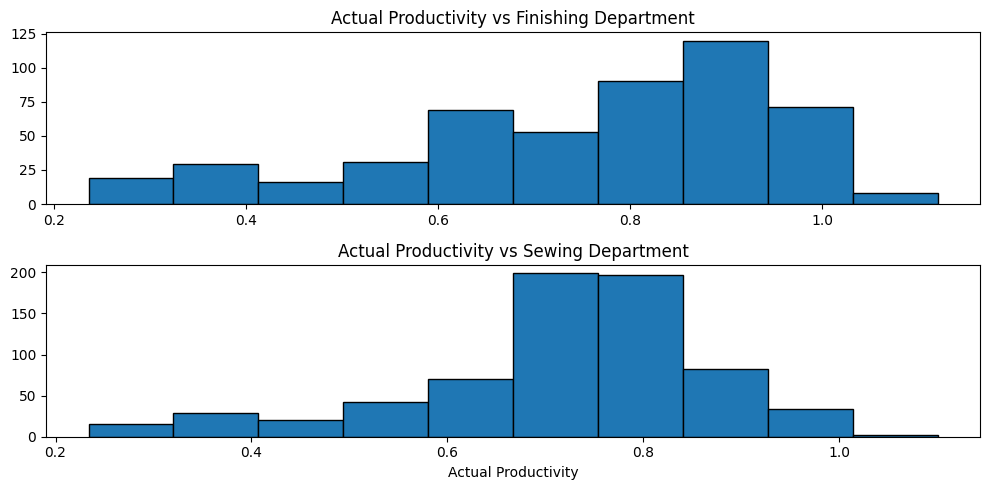

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5),dpi=100)

ax[0].hist(garments_employees[garments_employees.department == 'finishing'].actual_productivity, edgecolor='black')
ax[1].hist(garments_employees[garments_employees.department == 'sewing'].actual_productivity, edgecolor='black')

ax[0].set_title('Actual Productivity vs Finishing Department')
ax[1].set_title('Actual Productivity vs Sewing Department')

ax[1].set_xlabel('Actual Productivity')

plt.tight_layout()
plt.show()

### **Conclusion**: Productivity Analysis on Sewing vs. Finishing Departments

 * **Finishing Department**: Reveals a higher mean productivity (0.7529) compared to sewing (0.7220). However, it also displays a greater standard deviation (0.1970) indicating higher variability in performance. This suggests that while the finishing department generally outperforms sewing, but its productivity levels are less consistent.
 * **Sewing Department**: While the mean productivity is lower than finishing, it shows less variability (0.1548 standard deviation). This implies a more stable performance within the sewing department.


### 6. Number count for teams, smv across the year

In [60]:
garments_employees.team.value_counts()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

In [61]:
garments_employees.smv.value_counts()

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64

### 7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and Conclude accordingly

<ipython-input-84-851c0bd85abb>:21: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.histplot(data=garments_employees, x='actual_productivity', hue=category, kde=True, palette=sns.color_palette('dark'),  multiple='stack', ax=axis[i, 2], edgecolor='black' )
<ipython-input-84-851c0bd85abb>:21: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=garments_employees, x='actual_productivity', hue=category, kde=True, palette=sns.color_palette('dark'),  multiple='stack', ax=axis[i, 2], edgecolor='black' )
<ipython-input-84-851c0bd85abb>:21: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=garments_employees, x='actual_productivity', hue=category, kde=True, palette=sns.color_palette('dark'),  multiple='stack', ax=axis[i, 2], edgecolor='black' )
<ipython-input-84-851c0bd85abb>:29: Use

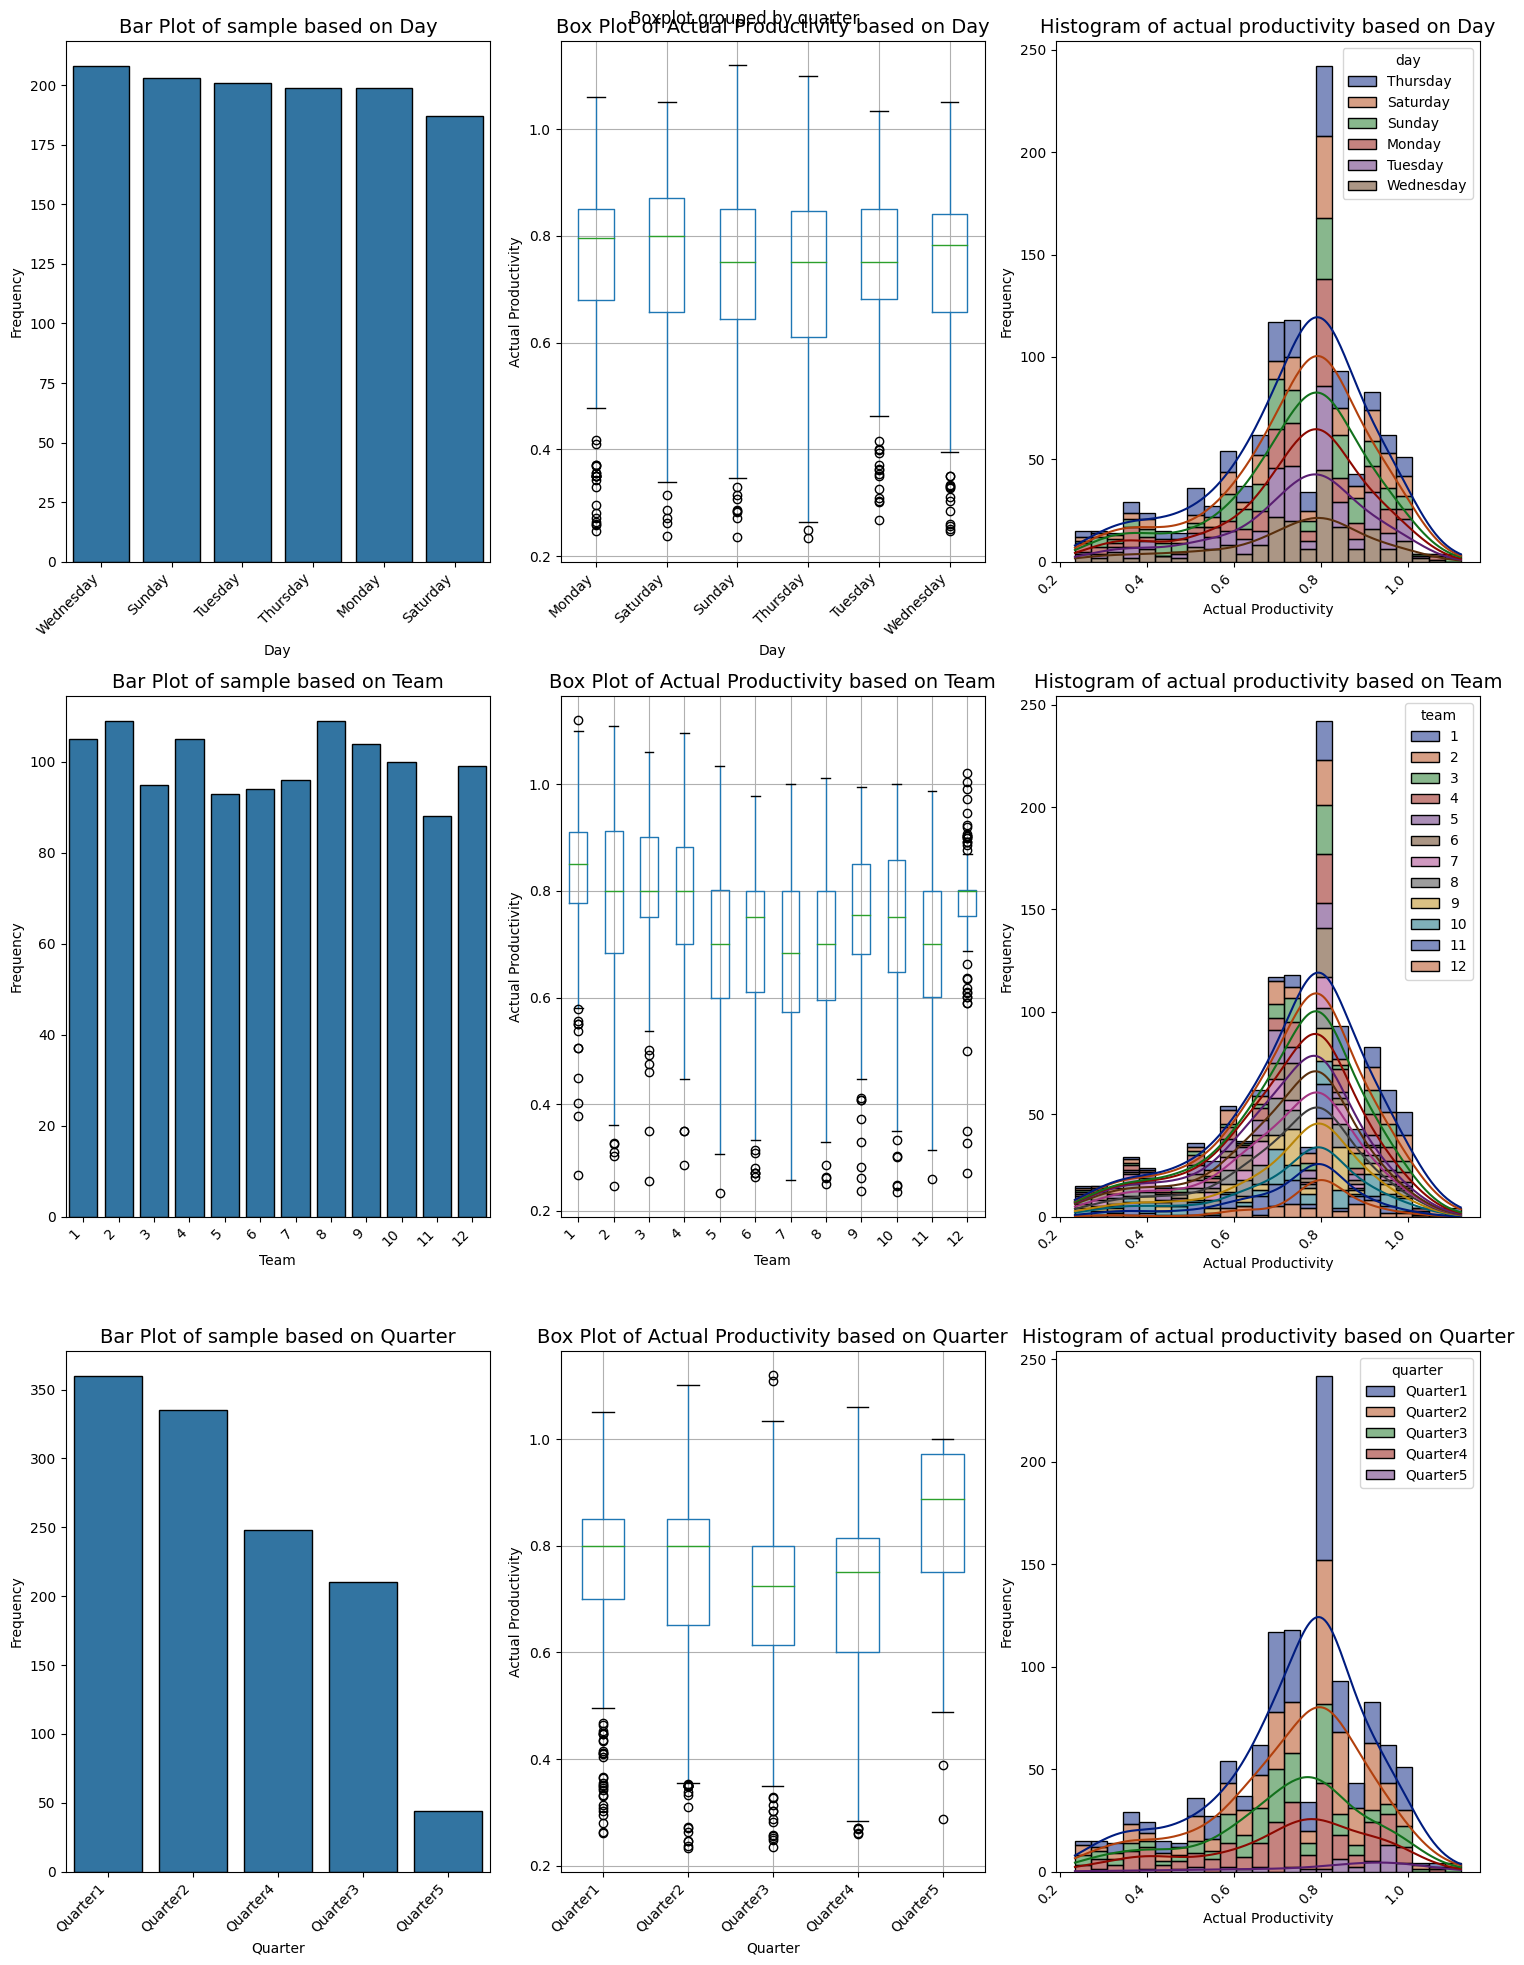

In [84]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(15, 20), dpi=100)

# Define categories
categories = ['day', 'team', 'quarter']

# Generate plots
for i, category in enumerate(categories):
    # Bar Grapghs
    sns.barplot(data=garments_employees[category].value_counts(), ax=axis[i, 0], edgecolor='black' )
    axis[i, 0].set_title(f'Bar Plot of sample based on {category.capitalize()}')
    axis[i, 0].set_xlabel(category.capitalize())
    axis[i, 0].set_ylabel('Frequency')

    # Box plot
    garments_employees.boxplot(column='actual_productivity', by=category, ax=axis[i, 1])
    axis[i, 1].set_title(f'Box Plot of Actual Productivity based on {category.capitalize()}')
    axis[i, 1].set_xlabel(category.capitalize())
    axis[i, 1].set_ylabel('Actual Productivity')

    # Histogram
    sns.histplot(data=garments_employees, x='actual_productivity', hue=category, kde=True, palette=sns.color_palette('dark'),  multiple='stack', ax=axis[i, 2], edgecolor='black' )
    axis[i, 2].set_title(f'Histogram of actual productivity based on {category.capitalize()}')
    axis[i, 2].set_xlabel('Actual Productivity')
    axis[i, 2].set_ylabel('Frequency')

# Remove the automatic title from Pandas plot
for ax in axis.flatten():
    ax.title.set_size(14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

### 8. Find correlation matrix and draw heat map for all variables

In [85]:
garments_employees.corr(numeric_only=True)


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


<Axes: >

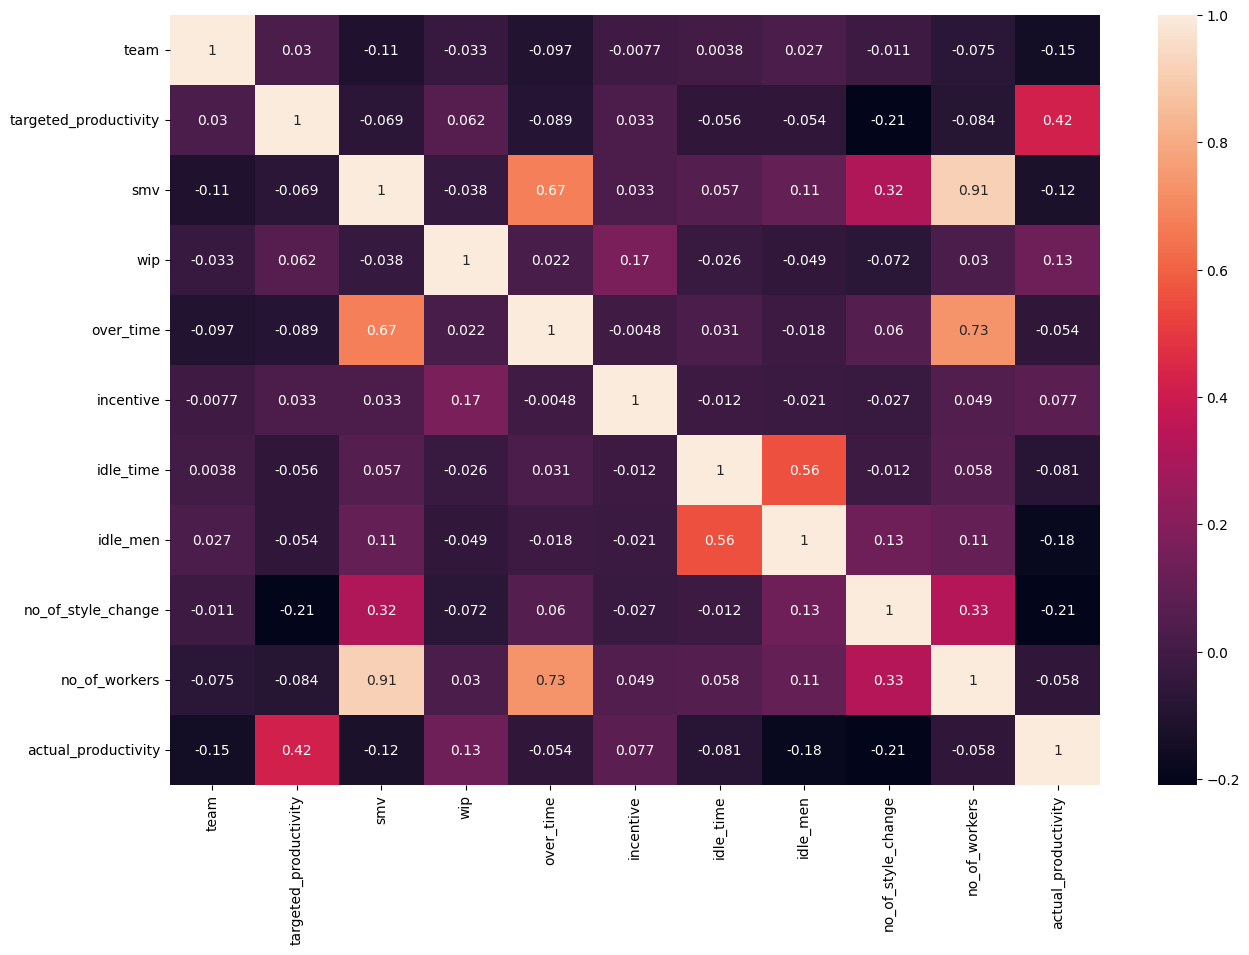

In [89]:
plt.figure(figsize=(15, 10))
sns.heatmap(garments_employees.corr(numeric_only=True),annot=True)

### 9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)-

* **Meeting Target**: The positive correlation between targeted & actual productivity suggests that the company is making achivable targets. But due to negative correlation between idle time and actual productivity indicates that reducing idle time is crucial to consistently meet targets.
* **Incentives vs Productivity**: Due to least positive correlation between incentive and actual productivity suggests that incentives might have a small positive impact, but they are not the primary parameter of productivity.
* **Impact of Overtime**: The moderate positive correlation between overtime and idle men suggests that increasing overtime might lead to more idle time. By considering this, there is strong negative correlation between idle time and actual productivity, indicates that overtime might not be a effective strategy to boost productivity.


### 10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude

In [91]:
#10# For every quarter
print("Correlation between actual and targeted productivity for each quarter:")
print(garments_employees.groupby('quarter')[['actual_productivity', 'targeted_productivity']].corr())

# For every department
print("\nCorrelation between actual and targeted productivity for each department:")
print(garments_employees.groupby('department')[['actual_productivity', 'targeted_productivity']].corr())

Correlation between actual and targeted productivity for each quarter:
                                actual_productivity  targeted_productivity
quarter                                                                   
Quarter1 actual_productivity               1.000000               0.492779
         targeted_productivity             0.492779               1.000000
Quarter2 actual_productivity               1.000000               0.427164
         targeted_productivity             0.427164               1.000000
Quarter3 actual_productivity               1.000000               0.392637
         targeted_productivity             0.392637               1.000000
Quarter4 actual_productivity               1.000000               0.347594
         targeted_productivity             0.347594               1.000000
Quarter5 actual_productivity               1.000000               0.479972
         targeted_productivity             0.479972               1.000000

Correlation between actual a

## Conclusion
Correlation between Actual and Targeted Productivity
#### By Quarter:
 * There is a weak positive correlation between actual and targeted productivity for each quarter.
 * This indicates that while there is a general trend for actual productivity to increase with higher targets, the relationship is not strong. Other factors significantly influence actual productivity.

#### By Department:
 * The finishing department shows a very weak correlation between actual and targeted productivity, suggesting a minimal relationship.
 * The sewing department exhibits a strong positive correlation, indicating that actual productivity closely follows the set targets.

### 11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.
1. Productivity varies across different quarters, with some quarters showing higher or lower productivity levels. This could be due to change in seasonality where certain periods may be busier or slower due to seasonal demand.
2. Changes in management strategies or policies might affect productivity.
3. Productivity can vary across different days of the week this could be due to uneven workload distribution, overwork with some days being more hectic than others. Productivity may decrease towards the end of the week due to fatigue.
4. Different team sizes show varying productivity levels. Larger teams might have coordination challenges, whereas smaller teams may be more agile. Effective communication within teams can influence productivity positively.
5. Different departments like sewing, finishing show varying productivity levels. This could be due to differences in employee skills and experience added with task complexity.
6. With respect to actual and targeted productivity, setting realistic and achievable targets can motivate employees.
7. Acknowledgement of ones efforts added with monetary and non-monetary incentives can boost employee motivation.
8. Excessive overtime can lead to employee burnout and reduced productivity. Adequate compensation for overtime might motivate employees to maintain productivity levels.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.


### 12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

In [ ]:
#12

### 13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

In [ ]:
#13

### 14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing department. State your null and alternative hypothesis

In [ ]:
#14

### 15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

In [ ]:
#15

### 16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher as greater than or equal to .75. He believes that the percentage of actual producvity in sewing departemnt for person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his hypothesis is right or not

In [ ]:
#16

### 17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

In [ ]:
#17

### 18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

In [ ]:
#18

### 19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

In [ ]:
#19

### 20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.